<a href="https://colab.research.google.com/github/Onethybeing/pytorch_implementation/blob/main/mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [39]:
model = maskrcnn_resnet50_fpn(pretrained= True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [40]:
image_path = "/content/WIN_20241213_18_13_26_Pro.jpg"
image = Image.open(image_path).convert("RGB")

In [41]:
COCO_INSTANCE_CATEGORY_NAMES = [
'__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [42]:
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)
with torch.no_grad():
  output = model(image_tensor)

In [43]:
#extract results boxes,masks ,scores
boxes = output[0]["boxes"].cpu().numpy()
labels = output[0]["labels"].cpu().numpy()
masks = output[0]["masks"].cpu().numpy()
scores = output[0]["scores"].cpu().numpy()

In [44]:
print(output)

[{'boxes': tensor([[ 263.6034,  108.5543, 1058.2035,  711.0110],
        [ 624.8577,  514.2164, 1146.3579,  720.0000],
        [ 679.4917,  335.4437, 1011.9216,  437.0694],
        [ 691.3763,  330.2111,  996.7258,  442.4252],
        [ 542.5324,  371.6739, 1142.3223,  715.1252],
        [ 452.8346,  534.9503, 1107.0620,  714.3578]]), 'labels': tensor([ 1,  1, 75, 76,  1, 27]), 'scores': tensor([0.9980, 0.6821, 0.5218, 0.2125, 0.1033, 0.0601]), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],




In [45]:
#filters based on confidence score
threshold = 0.6
selected_indices = scores>threshold
boxes = boxes[selected_indices]
masks = masks[selected_indices]
#labels = labels[selected_indices] # Filter labels as well

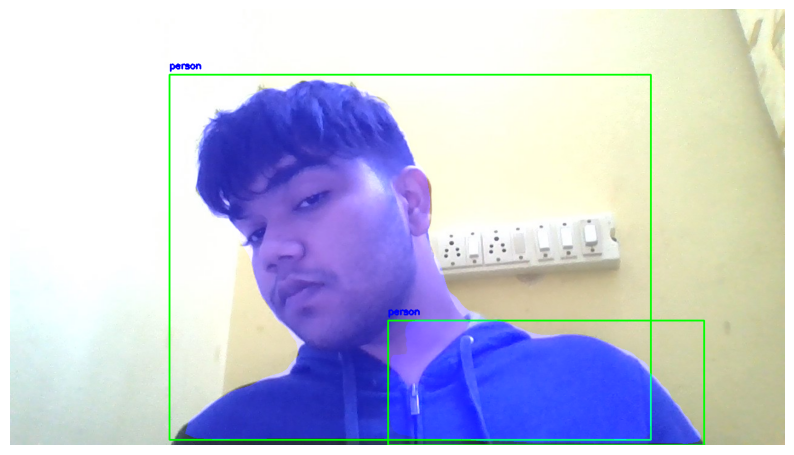

In [46]:
#convert masks to binary
masks =(masks > 0.5).squeeze(1) # Squeeze the correct axis (index 1)
# convert image to numpy as array
image_np = np.array(image)
#draw results
for i in range(len(boxes)):
  x1,y1,x2,y2 = map(int,boxes[i])
  cv2.rectangle(image_np,(x1,y1),(x2,y2),(0,256,0),2)
  label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
  cv2.putText(image_np,label,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2)
  #overlay mask
  mask = masks[i].astype(np.uint8)*255
  colored_mask = np.zeros_like(image_np)
  colored_mask[:,:,2] = mask # red channel
  image_np = cv2.addWeighted(image_np,1,colored_mask,0.5,0)

# save result
cv2.imwrite("output_img.png", image_np)

plt.figure(figsize=(10,10))
plt.imshow(image_np)
plt.axis("off")
plt.show()

In [21]:
masks[0].sum()

np.int64(248642)